<a href="https://colab.research.google.com/github/AhMedDa1/Machine-Learning/blob/main/car_price_prediction_Rihal_challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Car Price Prediction


the data contain a categorical  features we have to deal with it by one of two method, drop the columns with categorical or encode it, first i will remove the categorical. and check if there any missing values, after that will apply the model and calculate the MEA. i will use RandomForestRegressor model. and for the categorical encoding i will use OneHotEncoder. Finally i will use SimpleImputer to deal with missing values (fill it with mean)

In [ ]:
# Importing the required libraries
import pandas as pd               
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error

In [ ]:
train = pd.read_csv("data_train.csv")
test = pd.read_csv("data_test.csv")

In [ ]:
# Function for run the model and calculate the mae
def score_dataset(X_train, X_valid, y_train, y_valid):
    model = RandomForestRegressor(n_estimators=1000, random_state=0)
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    return mean_absolute_error(y_valid, preds)

In [ ]:
#here will print the categorical 

s = (train.dtypes == 'object')
object_cols = list(s[s].index)
print(object_cols)

['manufacturer_name', 'transmission', 'color', 'engine_fuel', 'engine_type', 'body_type', 'ownership', 'type_of_drive']


In [ ]:
# i will try to remove all categarical to and calculate the accuaracy 

# splitting the test data to x,y
y_test = test.price_usd
x_test = test.drop(object_cols,axis=1)
x_test = x_test.drop('price_usd',axis=1)

#splitting the training data to x and y
y_train = train.price_usd
x_train = train.drop(object_cols,axis=1)
x_train = x_train.drop('price_usd',axis=1)

Get names of columns with missing values

In [ ]:
cols_with_missing = [col for col in x_train.columns
                     if x_train[col].isnull().any()]
cols_with_missing

['engine_capacity']

here will fill tha NaN values in engine_capacity

In [ ]:
# Imputation
my_imputer = SimpleImputer()
imputed_X_train = pd.DataFrame(my_imputer.fit_transform(x_train))
imputed_X_valid = pd.DataFrame(my_imputer.transform(x_test))

In [ ]:
print("MAE from Drop categorical variables :")
print(score_dataset(imputed_X_train, imputed_X_valid, y_train, y_test))

MAE from Drop categorical variables :
938.0406336014078


As you see the mae is un acceptabel somehow so we will use the another way to deal with categorical.

### Step 1: Reading and Understanding the Data

here i will try to get insight from the data. and visualize some feature to see which important to predict. after that i will use     to automate the process of importance feature. and prevent the lowest importance ones and calculate the MEA again and see the difference.  

1. Importing data using the pandas library
2. Understanding the structure of the data

In [ ]:
train = pd.read_csv('data_train.csv')
test = pd.read_csv('data_test.csv')
train.head()

,manufacturer_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_type,engine_capacity,body_type,has_warranty,ownership,type_of_drive,is_exchangeable,number_of_photos,number_of_maintenance,duration_listed,price_usd
0,Volkswagen,automatic,black,130000,2016,diesel,diesel,1.6,universal,False,owned,front,True,17,38,67,13150.0
1,Renault,manual,brown,149000,2012,gasoline,gasoline,1.6,sedan,False,owned,front,False,9,3,100,7500.0
2,Kia,automatic,brown,110000,2014,gasoline,gasoline,1.6,hatchback,False,owned,front,False,5,10,91,12200.0
3,Opel,automatic,other,255100,2007,gasoline,gasoline,1.8,hatchback,False,owned,front,False,10,4,91,4950.0
4,Mazda,manual,blue,650000,1999,gasoline,gasoline,2.0,sedan,False,owned,front,True,5,7,62,3000.0


to get statistical insight from the data

In [ ]:
train.describe()

,odometer_value,year_produced,engine_capacity,number_of_photos,number_of_maintenance,duration_listed,price_usd
count,50000.000000,50000.000000,49985.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,249219.881980,2002.945620,2.056894,9.662420,16.256940,80.739440,6654.891274
std,136361.343789,8.067141,0.675106,6.145263,41.537349,113.606476,6467.096697
min,0.000000,1942.000000,0.200000,1.000000,1.000000,0.000000,1.000000
25%,158000.000000,1998.000000,1.600000,5.000000,2.000000,23.000000,2100.000000
50%,250000.000000,2003.000000,2.000000,8.000000,5.000000,59.000000,4800.000000
75%,325000.000000,2009.000000,2.300000,12.000000,16.000000,91.000000,8990.000000
max,1000000.000000,2019.000000,8.000000,86.000000,1273.000000,2232.000000,50000.000000


### Step 2 : Data Cleaning and Preparation

### Step 3: Visualizing the data


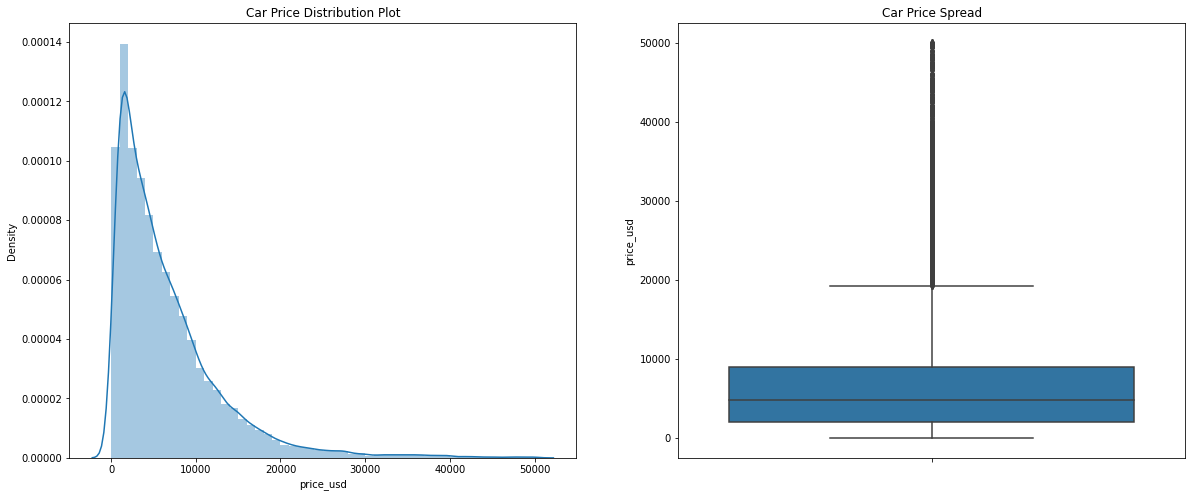

In [ ]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(train.price_usd)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=train.price_usd)

plt.show()

#### Step 3.1 : Visualising Categorical Data

    - manufacturer_name
    - transmission
    - color
    - engine_fuel
    - engine_type
    - body_type
    - ownership
    - type_of_drive
  



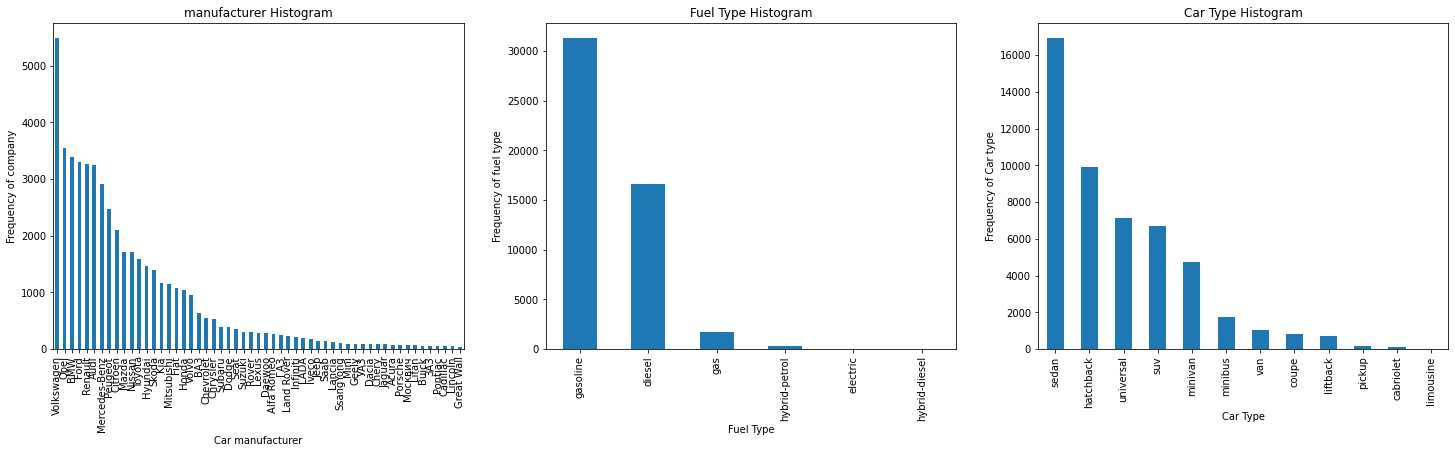

In [ ]:
plt.figure(figsize=(25, 6))

plt.subplot(1,3,1)
plt1 = train.manufacturer_name.value_counts().plot(kind='bar')
plt.title('manufacturer Histogram')
plt1.set(xlabel = 'Car manufacturer', ylabel='Frequency of company')

plt.subplot(1,3,2)
plt1 = train.engine_fuel.value_counts().plot(kind='bar')
plt.title('Fuel Type Histogram')
plt1.set(xlabel = 'Fuel Type', ylabel='Frequency of fuel type')

plt.subplot(1,3,3)
plt1 = train.body_type.value_counts().plot(kind='bar')
plt.title('Car Type Histogram')
plt1.set(xlabel = 'Car Type', ylabel='Frequency of Car type')

plt.show()

#### Inference :

1. `Volkswagen` seemed to be favored car company.
2. Number of `gasoline` fueled cars are more than `diesel` and others.
3. `sedan` is the top car type prefered.

for shortcut i will plot one feature to see the relation with price. i plot most of them and notice which one have direct relation with price. if you want to see one you can try to replace the body_type with the name you want to see. the above shapes show the Frequency of each feature. 

<Figure size 1440x576 with 0 Axes>

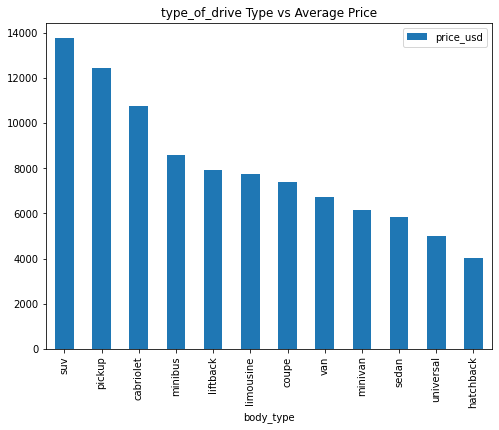

In [ ]:
plt.figure(figsize=(20,8))


df = pd.DataFrame(train.groupby(['body_type'])['price_usd'].mean().sort_values(ascending = False))
df.plot.bar(figsize=(8,6))
plt.title('type_of_drive Type vs Average Price')
plt.show()


In [ ]:
#here will print the categorical 

s = (train.dtypes == 'object')
object_cols = list(s[s].index)
print(object_cols)

['manufacturer_name', 'transmission', 'color', 'engine_fuel', 'engine_type', 'body_type', 'ownership', 'type_of_drive']


I will use factorize() function to encode the categorical variable as an enumerated type. to deal with it and calculate the MI score, the main aim for this cell is to devide the numarical and categorical values.

In [ ]:
drop = ['price_usd','engine_capacity'] # I remove engine_capacity cause it contain Nan values. we can will use simple imputer to deal with that
y = train.price_usd
x = train.drop(drop,axis=1)


y_t = test.price_usd
x_t = test.drop(drop,axis=1)

for colname in x.select_dtypes("object"):
    x[colname], _ = x[colname].factorize()

# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = x.dtypes == int

Mutual information (MI) between two random variables measures the dependency between the variables. fall in the range from 0 to 1. The higher value, the closer connection between this feature and the target, suggests that we should put this feature in the training dataset. If the MI score is 0 or very low like 0.01. the low score suggests a weak connection between this feature and the target.

In [ ]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(x, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(x, y, discrete_features)
mi_scores[::]  # show the features with their MI scores 

odometer_value           1.276592
year_produced            0.778877
duration_listed          0.320432
manufacturer_name        0.285349
number_of_photos         0.202991
body_type                0.192456
number_of_maintenance    0.168569
color                    0.159106
transmission             0.156156
type_of_drive            0.111928
ownership                0.058760
engine_fuel              0.049070
has_warranty             0.044814
engine_type              0.035464
is_exchangeable          0.033214
Name: MI Scores, dtype: float64

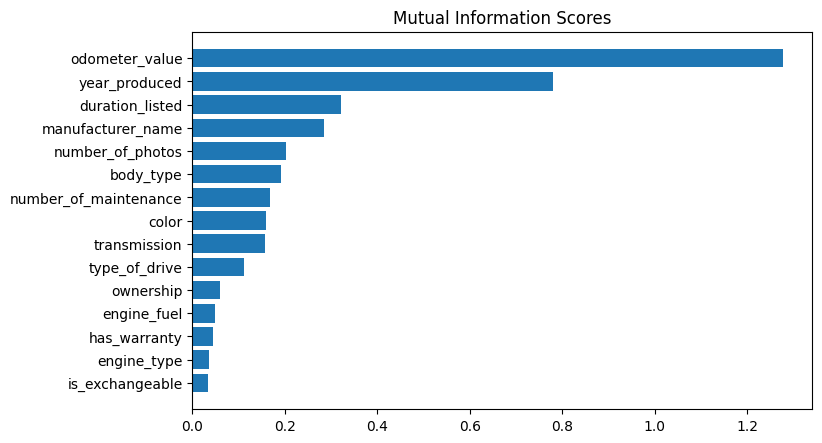

In [ ]:
def plot_mi_scores(scores): # this function plot the mi score for the above features 
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

### Step 6 : One-Hot encoder

after I detemine the most important features. i will remove the lowest mi score feature cause it donsn't effect the predict.

In [ ]:
cars_lr = train[['manufacturer_name', 'transmission', 'color', 'odometer_value','year_produced', 'engine_fuel', 'engine_capacity','body_type',
                 'has_warranty', 'ownership', 'type_of_drive', 'number_of_photos', 'number_of_maintenance','duration_listed']]
x_t = test[['manufacturer_name', 'transmission', 'color', 'odometer_value','year_produced', 'engine_fuel', 'engine_capacity','body_type',
                 'has_warranty', 'ownership', 'type_of_drive', 'number_of_photos', 'number_of_maintenance','duration_listed']]


In [ ]:
object_cols = ['manufacturer_name', 'transmission','type_of_drive','body_type','ownership','color','engine_fuel']
# we need this to pass it to the on_encoder to encode it 

In [ ]:
# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(cars_lr[object_cols]))
OH_cols_valid = pd.DataFrame(OH_encoder.transform(x_t[object_cols]))

# One-hot encoding removed index; put it back
OH_cols_train.index = cars_lr.index
OH_cols_valid.index = x_t.index

# Remove categorical columns (will replace with one-hot encoding)
num_X_train = cars_lr.drop(object_cols, axis=1)
num_X_valid = x_t.drop(object_cols, axis=1)


# Add one-hot encoded columns to numerical features
OH_X_train = pd.concat([num_X_train, OH_cols_train], axis=1)
OH_X_valid = pd.concat([num_X_valid, OH_cols_valid], axis=1)

In [ ]:
# Imputation
my_imputer = SimpleImputer()
imputed_X_train = pd.DataFrame(my_imputer.fit_transform(OH_X_train))
imputed_X_valid = pd.DataFrame(my_imputer.transform(OH_X_valid))

In [ ]:
print("MAE from Approach 2 (using on-hot encoding): ")
print(score_dataset(imputed_X_train, imputed_X_valid, y_train, y_test))

MAE from Approach 2 (using on-hot encoding): 
635.7308805427158


### Step 9 : Residual Analysis of Model

In [ ]:
preds = model.predict(x_test)

Text(0.5, 0, 'Errors')

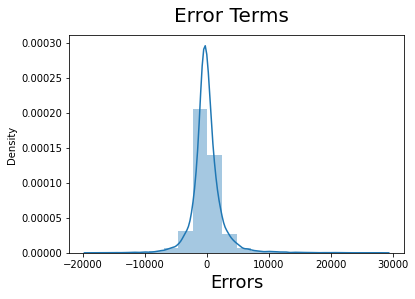

In [ ]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_test - preds), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)   

Error terms seem to be approximately normally distributed, so the assumption on the linear modeling seems to be fulfilled.